In [82]:
import pandas as pd # pandas
import json 

# df = pd.read_json('./articles/daum_titles_20211205_문화.json')
import json
# load data using Python JSON module
with open('./titles/daum_titles_20211205_문화.json','r') as f:
    data = json.loads(f.read())
# Flatten data

df_nested_list = pd.json_normalize(data, record_path =['articles'])


df_nested_list


,id,title,url
0,001_01,"'감염 전문가' 이재갑 ""방역패스, 미접종자 보호 전략..접종이 답""",https://v.daum.net/v/20211205235205266
1,001_02,[날씨] 내일 포근한 날씨..오후부터 차차 구름 많음,https://v.daum.net/v/20211205234801218
2,001_03,"[임상돋보기]코오롱티슈진 '인보사', 美서 고관절 골관절염 2상 승인",https://v.daum.net/v/20211205231605874
3,001_04,스토케(STOKKE) 유모차 방한 액세서리 '풋머프(FOOT MUFF)',https://v.daum.net/v/20211205230040772
4,001_05,온가족이 함께..거장들의 걸작 매력에 쏙~ [포토뉴스],https://v.daum.net/v/20211205225941765
...,...,...,...
381,026_07,오늘 전국 대체로 맑은 가운데 낮부터 기온 다소 올라,https://v.daum.net/v/20211205000039301
382,026_08,[오늘의 날씨] 아침 영하권 추위..낮부터 차차 기온 상승,https://v.daum.net/v/20211205000026297
383,026_09,[녹유 오늘의 운세] 56년생 부정의 생각은 지우개로 지워요,https://v.daum.net/v/20211205000018293
384,026_10,[인플루언서 프리즘] 일상부터 삶의 지혜까지..'주부 유튜버'가 뜬다,https://v.daum.net/v/20211205000012289


In [83]:
# To include school_name and class
df_nested_list = pd.json_normalize(
    data, 
    record_path =['articles'], 
    meta=['date', 'category']
)

df_nested_list['url']

0      https://v.daum.net/v/20211205235205266
1      https://v.daum.net/v/20211205234801218
2      https://v.daum.net/v/20211205231605874
3      https://v.daum.net/v/20211205230040772
4      https://v.daum.net/v/20211205225941765
                        ...                  
381    https://v.daum.net/v/20211205000039301
382    https://v.daum.net/v/20211205000026297
383    https://v.daum.net/v/20211205000018293
384    https://v.daum.net/v/20211205000012289
385    https://v.daum.net/v/20211205000001282
Name: url, Length: 386, dtype: object

In [84]:
# from newspaper import Article

# #크롤링할 url 주소 입력
# url = 'https://v.daum.net/v/20211205234056079'

# #언어가 한국어이므로 language='ko'로 설정
# a = Article(url, language='ko')
# a.download()
# a.parse()
# for i in df_nested_list['url']:
    
# #기사 제목 가져오기

#  sentence 묶기, nonus 뽑아서 df 만들기

In [85]:
import pandas as pd

df = pd.read_json('./articles/daum_articles_20211205_문화.json')
df.drop(['id', 'category', 'publish_date', 'extractive', 'abstractive'], axis=1, inplace=True)
result = ''
for i in range(len(df['article'])):
    result = []
    for j in range(len(df['article'][i])):
        result+=(df['article'][i][j]['sentence']).strip()
    df['article'][i] =''.join(result)

df

,title,article
0,"'감염 전문가' 이재갑 ""방역패스, 미접종자 보호 전략..접종이 답""",최근 정부에서 접종증명 및 음성확인서 제출을 골자로 하는 이른바 ‘방역 패스’를 청...
1,[날씨] 내일 포근한 날씨..오후부터 차차 구름 많음,오늘 추위가 누그러지고 활동하기 좋은 날씨가 이어졌습니다.내일은 오늘보다 기온이 더...
2,"[임상돋보기]코오롱티슈진 '인보사', 美서 고관절 골관절염 2상 승인",[이데일리 박미리 기자]한 주(11월29일~12월3일) 국내 제약·바이오 업계에서 ...
3,스토케(STOKKE) 유모차 방한 액세서리 '풋머프(FOOT MUFF)',프리미엄 유아용품 전문기업 스토케(STOKKE)가 겨울철 아이와 함께 따뜻한 외출이...
4,온가족이 함께..거장들의 걸작 매력에 쏙~ [포토뉴스],[경향신문]포토뉴스 갤러리 이동서울 예술의전당 한가람 미술관에서 열리고 있는 <초...
...,...,...
381,오늘 전국 대체로 맑은 가운데 낮부터 기온 다소 올라,오늘은 전국이 대체로 맑은 가운데 아침에는 춥겠지만 낮부터 기온이 차차 오르겠습니다...
382,[오늘의 날씨] 아침 영하권 추위..낮부터 차차 기온 상승,"[더팩트ㅣ이효균 기자] 일요일인 5일 전국 대부분은 영하권의 추위가 이어지겠으나, ..."
383,[녹유 오늘의 운세] 56년생 부정의 생각은 지우개로 지워요,[서울=뉴시스] 녹유(錄喩)의 '오늘의 운세' 2021년 12월 5일 일요일 (음력...
384,[인플루언서 프리즘] 일상부터 삶의 지혜까지..'주부 유튜버'가 뜬다,[더팩트｜한예주 기자] 유튜브에 '주부의 시대'가 찾아왔다. 육아·요리·인테리어·교...


In [86]:
from konlpy.tag import Okt
okt = Okt()
df['article_nouns'] = ''
df['title_nouns'] = ''

for i in range(len(df['article'])):
    tmp = okt.nouns(df['article'][i])
    df['article_nouns'][i] = tmp

for i in range(len(df['title'])):
    tmp = okt.nouns(df['title'][i])
    df['title_nouns'][i] = tmp

# 전처리

In [87]:
import string
exclude = string.punctuation + '‘’·“”…'

def preprocess_title(sent):
    return "".join(chr for chr in sent if chr not in exclude)

titles = list(map(preprocess_title, df.iloc[:,0]))
print(exclude)
print(titles[:3])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~‘’·“”…
['감염 전문가 이재갑 방역패스 미접종자 보호 전략접종이 답', '날씨 내일 포근한 날씨오후부터 차차 구름 많음', '임상돋보기코오롱티슈진 인보사 美서 고관절 골관절염 2상 승인']


In [88]:
df.iloc[:,0]

0        '감염 전문가' 이재갑 "방역패스, 미접종자 보호 전략..접종이 답"
1                 [날씨] 내일 포근한 날씨..오후부터 차차 구름 많음
2        [임상돋보기]코오롱티슈진 '인보사', 美서 고관절 골관절염 2상 승인
3      스토케(STOKKE) 유모차 방한 액세서리 '풋머프(FOOT MUFF)'
4                온가족이 함께..거장들의 걸작 매력에 쏙~ [포토뉴스]
                         ...                   
381               오늘 전국 대체로 맑은 가운데 낮부터 기온 다소 올라
382            [오늘의 날씨] 아침 영하권 추위..낮부터 차차 기온 상승
383           [녹유 오늘의 운세] 56년생 부정의 생각은 지우개로 지워요
384      [인플루언서 프리즘] 일상부터 삶의 지혜까지..'주부 유튜버'가 뜬다
385                 [오늘의 운세] 2021년 12월 5일 띠별 운세
Name: title, Length: 386, dtype: object

In [89]:
import csv
origin_df = df
df.to_csv("daum_1205_문화_title_artile_nouns.csv", index=False)


# start clustering

In [90]:
origin_df

,title,article,article_nouns,title_nouns
0,"'감염 전문가' 이재갑 ""방역패스, 미접종자 보호 전략..접종이 답""",최근 정부에서 접종증명 및 음성확인서 제출을 골자로 하는 이른바 ‘방역 패스’를 청...,"[최근, 정부, 접종, 증명, 및, 음성, 확인, 제출, 골자, 방역, 패스, 를,...","[감염, 전문가, 이재, 갑, 방역, 패스, 미접, 종자, 보호, 전략, 접종, 답]"
1,[날씨] 내일 포근한 날씨..오후부터 차차 구름 많음,오늘 추위가 누그러지고 활동하기 좋은 날씨가 이어졌습니다.내일은 오늘보다 기온이 더...,"[오늘, 추위, 누, 활동, 날씨, 내일, 오늘, 기온, 더, 내일, 서울, 아침,...","[날씨, 내일, 날씨, 오후, 차차, 구름]"
2,"[임상돋보기]코오롱티슈진 '인보사', 美서 고관절 골관절염 2상 승인",[이데일리 박미리 기자]한 주(11월29일~12월3일) 국내 제약·바이오 업계에서 ...,"[이데일리, 박, 미리, 기자, 주, 국내, 제약, 바이오, 업계, 주목, 임, 코...","[임, 돋보기, 코오롱, 티슈, 진, 인, 보사, 관절, 골, 관절염, 상, 승인]"
3,스토케(STOKKE) 유모차 방한 액세서리 '풋머프(FOOT MUFF)',프리미엄 유아용품 전문기업 스토케(STOKKE)가 겨울철 아이와 함께 따뜻한 외출이...,"[프리미엄, 유아, 용품, 전문, 기업, 스토케, 겨울철, 아이, 외출, 아이템, ...","[스토케, 유모차, 방한, 액세서리, 풋머프]"
4,온가족이 함께..거장들의 걸작 매력에 쏙~ [포토뉴스],[경향신문]포토뉴스 갤러리 이동서울 예술의전당 한가람 미술관에서 열리고 있는 <초...,"[경향신문, 포토, 뉴스, 갤러리, 이동, 서울, 예술의전당, 한가람, 미술관, 초...","[가족, 거장, 걸작, 매력, 쏙, 포토, 뉴스]"
...,...,...,...,...
381,오늘 전국 대체로 맑은 가운데 낮부터 기온 다소 올라,오늘은 전국이 대체로 맑은 가운데 아침에는 춥겠지만 낮부터 기온이 차차 오르겠습니다...,"[오늘, 전국, 대체로, 맑은, 가운데, 아침, 낮, 기온, 차차, 오늘, 아침, ...","[오늘, 전국, 대체로, 맑은, 가운데, 낮, 기온, 다소]"
382,[오늘의 날씨] 아침 영하권 추위..낮부터 차차 기온 상승,"[더팩트ㅣ이효균 기자] 일요일인 5일 전국 대부분은 영하권의 추위가 이어지겠으나, ...","[더, 팩트, 이효균, 기자, 일요일, 전국, 대부분, 영하, 추위, 오후, 평년,...","[오늘, 날씨, 아침, 영하, 추위, 낮, 차차, 기온, 상승]"
383,[녹유 오늘의 운세] 56년생 부정의 생각은 지우개로 지워요,[서울=뉴시스] 녹유(錄喩)의 '오늘의 운세' 2021년 12월 5일 일요일 (음력...,"[서울, 뉴시스, 녹유, 의, 오늘, 운세, 일요일, 음력, 정해, 쥐띠, 고생, ...","[녹유, 오늘, 운세, 부정, 생각, 지우개]"
384,[인플루언서 프리즘] 일상부터 삶의 지혜까지..'주부 유튜버'가 뜬다,[더팩트｜한예주 기자] 유튜브에 '주부의 시대'가 찾아왔다. 육아·요리·인테리어·교...,"[더, 팩트, 예주, 기자, 유튜브, 주부, 시대, 육아, 요리, 인테리어, 교육,...","[인, 플루, 프리즘, 일상, 삶, 지혜, 주부, 유튜버]"


In [153]:
df['result'][0]

'\'감염 전문가\' 이재갑 "방역패스, 미접종자 보호 전략..접종이 답" 최근 정부에서 접종증명 및 음성확인서 제출을 골자로 하는 이른바 ‘방역 패스’를 청소년에게도 확대하기로 해 비판이 제기되고 있다. 이와 관련해 감염 전문가인 이재갑 한림대학교 강남성심병원 감염내과 교수는 “방역 패스는 책임 있는 행동을 요구하는 것”이라며 정부 방침을 지지하고 나섰다.이 교수는 지난 4일 페이스북에 ‘방역 패스 강화를 백신 의무화라고 하는 분들에게’라는 제목의 글을 게시했다.이 교수는 “방역 패스는 미접종자들이 접종을 안 하셨으니 음성확인서라도 내는 책임 있는 행동을 (하기를) 요구하는 것”이라며 “방역 패스는 미접종자 보호 전략”이라고 주장했다.이어 “백신 의무화라고 한다면 백신 미접종자의 검사나 치료를 본인부담하게 한다든지, 미접종자는 재택근무만 해야 한다든지 미접종자에게 벌금을 내게 한다든지, 아니면 독일처럼 미접종자는 필수 목적 외 외출을 금지한다든지 이 정도는 돼야 한다”라며 “우리나라는 아직 이런 정책 준비도 안 하고 있고 시행도 안 하고 있다”고 강조했다.그러면서 “백신 접종이 답”이라고 거듭 강조했다.이 교수는 5일 오후 JTBC ‘뉴스룸’에 출연한 자리에서도 “고등학교 3학년 접종할 때 중대 이상반응이 많지도 않았다. 또 심근염 위험이 높다고 했는데, 심근염 발생한 15명 전원 특별히 문제없이 퇴원했다”고 말했다. 아울러 “사망자가 발생한 적도 없다”고 강조했다.이 교수는 오히려 청소년의 경우 20대 이상 성인보다이상 반응이 나타날 확률이 적다고 주장했다.이 교수는 “전반적인 안전성과 관련된 데이터를 보면, 현재 18세 미만에 대한 전체 데이터를 보더라도 오히려 20~30대보다이상 반응 숫자가 작다. 그다음에 중증 이상 반응은 모든 연령대에서 가장 낮게 보고가 되고 있다”고 지적했다.이어 “전반적으로 아이들에 대한 예방접종이 안전하게 잘 이뤄지고 있다”며 “안심하시고 접종하는 게 어떨까 생각한다”고 말했다.이 교수는 “미국 같은 경우 현재 10~17세 같

In [154]:
df['result'] = ''
for i in range(len(df['title'])):
    df['result'][i] = df['title'][i] +" "+ df['article'][i]

df

,title,article,article_nouns,title_nouns,result
0,"'감염 전문가' 이재갑 ""방역패스, 미접종자 보호 전략..접종이 답""",최근 정부에서 접종증명 및 음성확인서 제출을 골자로 하는 이른바 ‘방역 패스’를 청...,"[최근, 정부, 접종, 증명, 및, 음성, 확인, 제출, 골자, 방역, 패스, 를,...","[감염, 전문가, 이재, 갑, 방역, 패스, 미접, 종자, 보호, 전략, 접종, 답]","'감염 전문가' 이재갑 ""방역패스, 미접종자 보호 전략..접종이 답"" 최근 정부에서..."
1,[날씨] 내일 포근한 날씨..오후부터 차차 구름 많음,오늘 추위가 누그러지고 활동하기 좋은 날씨가 이어졌습니다.내일은 오늘보다 기온이 더...,"[오늘, 추위, 누, 활동, 날씨, 내일, 오늘, 기온, 더, 내일, 서울, 아침,...","[날씨, 내일, 날씨, 오후, 차차, 구름]",[날씨] 내일 포근한 날씨..오후부터 차차 구름 많음 오늘 추위가 누그러지고 활동하...
2,"[임상돋보기]코오롱티슈진 '인보사', 美서 고관절 골관절염 2상 승인",[이데일리 박미리 기자]한 주(11월29일~12월3일) 국내 제약·바이오 업계에서 ...,"[이데일리, 박, 미리, 기자, 주, 국내, 제약, 바이오, 업계, 주목, 임, 코...","[임, 돋보기, 코오롱, 티슈, 진, 인, 보사, 관절, 골, 관절염, 상, 승인]","[임상돋보기]코오롱티슈진 '인보사', 美서 고관절 골관절염 2상 승인 [이데일리 박..."
3,스토케(STOKKE) 유모차 방한 액세서리 '풋머프(FOOT MUFF)',프리미엄 유아용품 전문기업 스토케(STOKKE)가 겨울철 아이와 함께 따뜻한 외출이...,"[프리미엄, 유아, 용품, 전문, 기업, 스토케, 겨울철, 아이, 외출, 아이템, ...","[스토케, 유모차, 방한, 액세서리, 풋머프]",스토케(STOKKE) 유모차 방한 액세서리 '풋머프(FOOT MUFF)' 프리미엄 ...
4,온가족이 함께..거장들의 걸작 매력에 쏙~ [포토뉴스],[경향신문]포토뉴스 갤러리 이동서울 예술의전당 한가람 미술관에서 열리고 있는 <초...,"[경향신문, 포토, 뉴스, 갤러리, 이동, 서울, 예술의전당, 한가람, 미술관, 초...","[가족, 거장, 걸작, 매력, 쏙, 포토, 뉴스]",온가족이 함께..거장들의 걸작 매력에 쏙~ [포토뉴스] [경향신문]포토뉴스 갤러리...
...,...,...,...,...,...
381,오늘 전국 대체로 맑은 가운데 낮부터 기온 다소 올라,오늘은 전국이 대체로 맑은 가운데 아침에는 춥겠지만 낮부터 기온이 차차 오르겠습니다...,"[오늘, 전국, 대체로, 맑은, 가운데, 아침, 낮, 기온, 차차, 오늘, 아침, ...","[오늘, 전국, 대체로, 맑은, 가운데, 낮, 기온, 다소]",오늘 전국 대체로 맑은 가운데 낮부터 기온 다소 올라 오늘은 전국이 대체로 맑은 가...
382,[오늘의 날씨] 아침 영하권 추위..낮부터 차차 기온 상승,"[더팩트ㅣ이효균 기자] 일요일인 5일 전국 대부분은 영하권의 추위가 이어지겠으나, ...","[더, 팩트, 이효균, 기자, 일요일, 전국, 대부분, 영하, 추위, 오후, 평년,...","[오늘, 날씨, 아침, 영하, 추위, 낮, 차차, 기온, 상승]",[오늘의 날씨] 아침 영하권 추위..낮부터 차차 기온 상승 [더팩트ㅣ이효균 기자] ...
383,[녹유 오늘의 운세] 56년생 부정의 생각은 지우개로 지워요,[서울=뉴시스] 녹유(錄喩)의 '오늘의 운세' 2021년 12월 5일 일요일 (음력...,"[서울, 뉴시스, 녹유, 의, 오늘, 운세, 일요일, 음력, 정해, 쥐띠, 고생, ...","[녹유, 오늘, 운세, 부정, 생각, 지우개]",[녹유 오늘의 운세] 56년생 부정의 생각은 지우개로 지워요 [서울=뉴시스] 녹유(...
384,[인플루언서 프리즘] 일상부터 삶의 지혜까지..'주부 유튜버'가 뜬다,[더팩트｜한예주 기자] 유튜브에 '주부의 시대'가 찾아왔다. 육아·요리·인테리어·교...,"[더, 팩트, 예주, 기자, 유튜브, 주부, 시대, 육아, 요리, 인테리어, 교육,...","[인, 플루, 프리즘, 일상, 삶, 지혜, 주부, 유튜버]",[인플루언서 프리즘] 일상부터 삶의 지혜까지..'주부 유튜버'가 뜬다 [더팩트｜한예...


In [92]:
title_list = []

for i in df['title']:
    title_list.append(i)

In [93]:
TitDesc_list = []

for i in df['result']:
    TitDesc_list.append(i)
    

In [94]:
TitDesc_list[0]

'\'감염 전문가\' 이재갑 "방역패스, 미접종자 보호 전략..접종이 답" 최근 정부에서 접종증명 및 음성확인서 제출을 골자로 하는 이른바 ‘방역 패스’를 청소년에게도 확대하기로 해 비판이 제기되고 있다. 이와 관련해 감염 전문가인 이재갑 한림대학교 강남성심병원 감염내과 교수는 “방역 패스는 책임 있는 행동을 요구하는 것”이라며 정부 방침을 지지하고 나섰다.이 교수는 지난 4일 페이스북에 ‘방역 패스 강화를 백신 의무화라고 하는 분들에게’라는 제목의 글을 게시했다.이 교수는 “방역 패스는 미접종자들이 접종을 안 하셨으니 음성확인서라도 내는 책임 있는 행동을 (하기를) 요구하는 것”이라며 “방역 패스는 미접종자 보호 전략”이라고 주장했다.이어 “백신 의무화라고 한다면 백신 미접종자의 검사나 치료를 본인부담하게 한다든지, 미접종자는 재택근무만 해야 한다든지 미접종자에게 벌금을 내게 한다든지, 아니면 독일처럼 미접종자는 필수 목적 외 외출을 금지한다든지 이 정도는 돼야 한다”라며 “우리나라는 아직 이런 정책 준비도 안 하고 있고 시행도 안 하고 있다”고 강조했다.그러면서 “백신 접종이 답”이라고 거듭 강조했다.이 교수는 5일 오후 JTBC ‘뉴스룸’에 출연한 자리에서도 “고등학교 3학년 접종할 때 중대 이상반응이 많지도 않았다. 또 심근염 위험이 높다고 했는데, 심근염 발생한 15명 전원 특별히 문제없이 퇴원했다”고 말했다. 아울러 “사망자가 발생한 적도 없다”고 강조했다.이 교수는 오히려 청소년의 경우 20대 이상 성인보다이상 반응이 나타날 확률이 적다고 주장했다.이 교수는 “전반적인 안전성과 관련된 데이터를 보면, 현재 18세 미만에 대한 전체 데이터를 보더라도 오히려 20~30대보다이상 반응 숫자가 작다. 그다음에 중증 이상 반응은 모든 연령대에서 가장 낮게 보고가 되고 있다”고 지적했다.이어 “전반적으로 아이들에 대한 예방접종이 안전하게 잘 이뤄지고 있다”며 “안심하시고 접종하는 게 어떨까 생각한다”고 말했다.이 교수는 “미국 같은 경우 현재 10~17세 같

In [95]:
# from konlpy.tag import Hannanum
# from sklearn.feature_extraction.text import TfidfVectorizer

# hannanum = Hannanum()
# TitDesc_okt = []

# for item in TitDesc_list:
#   item_nouns = ' '.join(hannanum.nouns(item))
#   TitDesc_okt.append(item_nouns)

#   tfidf_vectorizer = TfidfVectorizer()
#   tfidf_matrix_okt = tfidf_vectorizer.fit_transform(TitDesc_okt)

# TitDesc_okt[:3]

['감염 전문 이재갑 방역패스 미접종자 보호 전략 접종 답 정부 접종증명 음성확인 제출 골자 ‘방역 패스’ 청소년 확대 비판 제기 이 관련해 감염 전문가 이재갑 한림대학교 강남성심병원 감염내 교수 “방역 패스 책 행동 요구 것”이라 정부 방침 교수 4일 페이스북 ‘방역 패스 강화 백신 의무화 분들에게’라 제목 글 게시 교수 “방역 패스 미접종자들 접종 음성확인 내 책 행동 요구 것”이라 “방역 패스 미접종자 보호 전략” 주장 이 “백신 의무화 백신 미접종자 검사 치료 본인부담 미접종자 재택근무 미접종자에 벌금 독일처럼 미접종자 수 목적 외 외출 금지 정도 한다”라 “우리나라 정책 준비 시행 있다”고 강조 “백신 접종 답” 강조 교수 5일 오후 ‘뉴스룸’ 출연 자리 “고등학교 3학년 접종할 때 중대 이상반응 심근염 위험 심근염 발생 15명 전원 퇴원했다”고 말 “사망자 발생 적 없다”고 강조 교수 청소년 경우 20대 이상 성인보다이상 반응 확률 주장 교수 “전반적 안전성 관련 데이터 18세 미만 전체 데이터 20~30대보다이상 반응 숫자 그다음 중증 이상 반응 연령대 있다”고 지적 이 “전반적 아이들 예방접종 안전 있다”며 “안심하시 접종하 것 어떨까 생각한다”고 말 교수 “미국 경우 현재 10 17세 경우 50 접종 스페 경우 80 이상 접종 스페인 심근염 보고들 전반적 이상 반응 전반적 숫자 16 17세 15세 미만 심근염 빈도 남자아이들 발생 사망 사례 없었다”라 “전반적 외국 사례 안전성 됐다”고 언급 신종 코로나바이러스 감염증(코로나19) 백신 접종 후 사망 고3 학생 2명 관련해서 “한 명 백혈병 사망 인과관계 한 사례 11월 17일 역학조사 부검 결과 않았다”고 ‘일부 학부모 백신 이득 위험 부담 판단 있다’ 지적 “미국 델타 변이 유행 예방접종 청소년 예방 접종하지 청소년 비교 때 입원율 예방접종 청소년 10배 이상 발생 했었다”라 반박 즉, 청소년 백신 접종 경우 입원율 현저 설명 교수 학원 방역 패스 일부 학부모 반대 의견 “아이들 학원 스터디

In [96]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

okt = Okt()
TitDesc_okt = []

for item in TitDesc_list:
  item_nouns = ' '.join(okt.nouns(item))
  TitDesc_okt.append(item_nouns)

  tfidf_vectorizer = TfidfVectorizer()
  tfidf_matrix_okt = tfidf_vectorizer.fit_transform(TitDesc_okt)

TitDesc_okt[:3]


In [97]:
# 사전에 학습시킨 단어 리스트

WordVoca_list = []
for item in TitDesc_okt:
    WordVoca_list.append(item.split(' '))

# split된 2차원 리스트 중에서 한 글자짜리 단어들을 모두 제외시키고 WordVoca 리스트 생성
# Word2Vec 모델 학습 데이터로 활용됨
WordVoca = []
for i in range(len(WordVoca_list)):
    element = []
    for j in range(len(WordVoca_list[i])):
        if len(WordVoca_list[i][j]) > 1:
            element.append(WordVoca_list[i][j])
    WordVoca.append(element)

In [156]:
'감염' in WordVoca[0]

True

In [99]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string

[nltk_data] Downloading package punkt to /opt/ml/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /opt/ml/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [100]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

from sklearn.decomposition import LatentDirichletAllocation

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

cnt_vect = CountVectorizer(tokenizer=LemNormalize,)

In [101]:
df_dict = {'TokenizedTitDesc':TitDesc_okt,
           'TitDesc':TitDesc_list}
doc_df = pd.DataFrame(df_dict)
doc_df['title'] = 0
doc_df['num']=0

for i in range(len(doc_df)):
  doc_df.iloc[i, 3] = i
  doc_df.iloc[i, 2] = title_list[i]
doc_df.head()


topic_df = doc_df

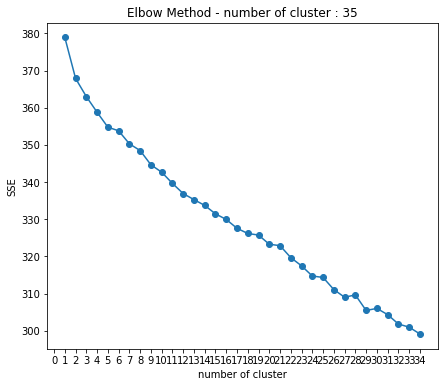

In [102]:
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

x = normalize(tfidf_matrix_okt)
# L2 정규화

def elbow(normalizedData, Clusters):
    sse = []
    for i in range(1,Clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
        kmeans.fit(normalizedData)
        sse.append(kmeans.inertia_)
    plt.figure(figsize=(7,6))
    plt.plot(range(1,Clusters), sse, marker='o')
    plt.xlabel('number of cluster')
    plt.xticks(np.arange(0,Clusters,1))
    plt.ylabel('SSE')
    plt.title('Elbow Method - number of cluster : '+str(Clusters))
    plt.show()
# elbow(x, 35)
elbow(x, 35)

In [103]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize)
feature_vect = tfidf_vect.fit_transform(topic_df['TokenizedTitDesc'])

In [104]:
clusters_num = 21 # 클러스터 개수 지정

km_cluster = KMeans(n_clusters=clusters_num, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [105]:
topic_df['cluster_label'] = cluster_label
topic_df.head()

for i in range(clusters_num):
  print('<<Clustering Label {0}>>'.format(i)+'\n')
  print(topic_df.loc[topic_df['cluster_label']==i])

<<Clustering Label 0>>

                                      TokenizedTitDesc  \
41         포토 기념촬영 글로벌 오디션 1위 정유정(럭셔리브랜드 모델어워즈 글로벌패션위크   
42          포토 기념촬영 글로벌오디션 2위 손예나(럭셔리브랜드 모델어워즈 글로벌패션위크   
44          포토 기념촬영 글로벌오디션 3위 이태인(럭셔리브랜드 모델어워즈 글로벌패션위크   
78                                    버터 美 올해 음반 박대 기자   
143  방탄소년단 버터 美 버라이어티 선정 올해 음반 수상 방탄소년단(BTS) 미국 연예매...   
272  美 연예지 선정 올해 음반 버터 특별 의미 곡 방탄소년단 미국 연예매체 버라이어티 ...   
277  2021 대한민국 기독예술대상'사진부분 대상 수상 강민석 국민일보 선임기자 (서율=...   
278  강민석 국민일보 선임기자 2021 대한민국 기독예술대상'사진부분 대상 수상 (서율=...   
279  강민석 국민일보 선임기자 2021 대한민국 기독예술대상'사진부분 대상 수상 (서율=...   
304  방탄소년단 美 버라이어티 선정 올해 음반 수상 방탄소년단 4일(현지시간) 미국 로스...   
305  일냈다" 美 연예지 선정 올해 음반 그룹 방탄소년단 미국 연예매체 버라이어티 주최 ...   
309  美 올해 음반 수상 버터 특별 의미 그룹 방탄소년단 미국 연예매체 버라이어티 주최 ...   

                                               TitDesc  \
41   [포토] 기념촬영하는 글로벌 오디션 1위 정유정(럭셔리브랜드 모델어워즈 글로벌패션위크)    
42    [포토] 기념촬영하는 글로벌오디션 2위 손예나(럭셔리브랜드 모델어워즈 글로벌패션위크)    
44    [포토] 기념촬영하는 글로벌오디션 3위 이태인(럭셔리브랜드 모델어워즈 글로

In [106]:
for cluster_num in set(topic_df['cluster_label']):
    print("cluster num : {}".format(cluster_num))
    temp_df = topic_df[topic_df['cluster_label'] == cluster_num] # cluster num 별로 조회
    for title in temp_df['title']:
        print(title) # 제목으로 살펴보자
    print()

cluster num : 0
[포토] 기념촬영하는 글로벌 오디션 1위 정유정(럭셔리브랜드 모델어워즈 글로벌패션위크)
[포토] 기념촬영하는 글로벌오디션 2위 손예나(럭셔리브랜드 모델어워즈 글로벌패션위크)
[포토] 기념촬영하는 글로벌오디션 3위 이태인(럭셔리브랜드 모델어워즈 글로벌패션위크)
BTS '버터' 美서 올해의 음반
방탄소년단 '버터', 美 버라이어티 선정 '올해의 음반' 수상
BTS, 美 연예지 선정 올해의 음반.."버터는 특별한 의미 갖는 곡"
'2021 대한민국 기독예술대상'사진부분 대상 수상한 강민석 국민일보 선임기자
강민석 국민일보 선임기자 '2021 대한민국 기독예술대상'사진부분 대상 수상
강민석 국민일보 선임기자 '2021 대한민국 기독예술대상'사진부분 대상 수상
방탄소년단, 美 버라이어티 선정 '올해의 음반' 수상
"BTS, 또 일냈다"..美 연예지 선정 올해의 음반
BTS, 美 '올해의 음반' 수상.."'버터' 특별한 의미"

cluster num : 1
SBS 노조, 내일부터 첫 파업 돌입..보도 부문 중단
SBS 내일부터 보도부문 파업..8시 뉴스 단축방송
SBS, 창사 이래 첫 파업.. 내일부터 뉴스 단축 편성
SBS 노사 최종협상 결렬..6일부터 8뉴스 단축
SBS 노조, 내일부터 첫 파업 돌입..보도 부문 중단
SBS '8 뉴스' 차질.. 창사 이래 첫 파업 빌미된 '임명동의제' 뭐기에

cluster num : 2
'감염 전문가' 이재갑 "방역패스, 미접종자 보호 전략..접종이 답"
"멀쩡했던 고3 딸이 백신맞고 뇌염"..가족들의 호소
"초6 딸, 화이자에 급성백혈병..RH+A형 필요해요" 피끓는 호소
"30년 전 문선명·김일성 회담은 놀랍고 혁신적"
결혼식 전 홈 케어를 위한 최적의 듀오, 라뮤즈 & 엠뉴
여에스더 "성욕감퇴 걱정말고 탈모약 먹어라"..남편 홍혜걸 반응은?
"백신 끝까지 안 맞겠다" 성우 쓰복만의 해명 보니
송내사랑의교회 부천시에 소외이웃 위한 성금 전달
제29회 전국장애인합창대회 열려
"노숙인에게 방한세트 선물

In [107]:
clustersNum = topic_df['cluster_label'].groupby(topic_df['cluster_label']).count()
temp_df= pd.DataFrame(clustersNum)

In [108]:
temp_df.columns = ['count']
len(temp_df['count'])

17

# 클러스터 별 기사 개수

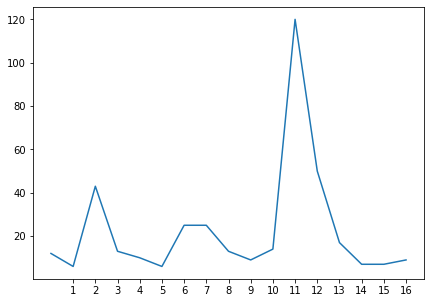

In [109]:
plt.figure(figsize=(7,5))
plt.plot(temp_df.index, temp_df['count'])
plt.xticks(np.arange(1, clusters_num))
plt.show()

# 클러스터별 대표 기사를 추출

In [110]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape : ', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape :  (17, 18061)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00057462 0.         0.00030999 ... 0.00030999 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [111]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 제목들을 반환함. 
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
    
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 제목 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화. 
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함. 
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
        
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함 
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['title']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['title'] = filenames
        
    return cluster_details

In [112]:
def print_cluster_details(cluster_details):    
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Title :',cluster_detail['title'][:7])
        print('==================================================')

In [113]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=topic_df,\
                                  feature_names=feature_names, clusters_num=clusters_num, top_n_features=10 )
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['버터', '방탄소년단', '수상', '시상식', '음반', '2021', '올해', '모델어워즈', '기념촬영', '글로벌패션위크']
Title : ['[포토] 기념촬영하는 글로벌 오디션 1위 정유정(럭셔리브랜드 모델어워즈 글로벌패션위크)', '[포토] 기념촬영하는 글로벌오디션 2위 손예나(럭셔리브랜드 모델어워즈 글로벌패션위크)', '[포토] 기념촬영하는 글로벌오디션 3위 이태인(럭셔리브랜드 모델어워즈 글로벌패션위크)', "BTS '버터' 美서 올해의 음반", "방탄소년단 '버터', 美 버라이어티 선정 '올해의 음반' 수상", 'BTS, 美 연예지 선정 올해의 음반.."버터는 특별한 의미 갖는 곡"', "'2021 대한민국 기독예술대상'사진부분 대상 수상한 강민석 국민일보 선임기자"]
####### Cluster 1
Top features: ['파업', '노조', '임명동의제', '뉴스', '사', '보', '경영진', '프로그램', '편성', '드라마']
Title : ['SBS 노조, 내일부터 첫 파업 돌입..보도 부문 중단', 'SBS 내일부터 보도부문 파업..8시 뉴스 단축방송', 'SBS, 창사 이래 첫 파업.. 내일부터 뉴스 단축 편성', 'SBS 노사 최종협상 결렬..6일부터 8뉴스 단축', 'SBS 노조, 내일부터 첫 파업 돌입..보도 부문 중단', "SBS '8 뉴스' 차질.. 창사 이래 첫 파업 빌미된 '임명동의제' 뭐기에"]
####### Cluster 2
Top features: ['“', '”', '것', '운동', '고', '백신', '’', '‘', '수', '등']
Title : ['\'감염 전문가\' 이재갑 "방역패스, 미접종자 보호 전략..접종이 답"', '"멀쩡했던 고3 딸이 백신맞고 뇌염"..가족들의 호소', '"초6 딸, 화이자에 급성백혈병..RH+A형 필요해요" 피끓는 호소', '"30년 전 문선명·김일성 회담은 놀랍고 혁신적"', '결혼식 전 홈 케어를 위한 

In [114]:
WordVoca_list = []
for item in TitDesc_okt:
    WordVoca_list.append(item.split(' '))

# split된 2차원 리스트 중에서 한 글자짜리 단어들을 모두 제외시키고 WordVoca 리스트 생성
# Word2Vec 모델 학습 데이터로 활용됨
WordVoca = []
for i in range(len(WordVoca_list)):
    element = []
    for j in range(len(WordVoca_list[i])):
        if len(WordVoca_list[i][j]) > 1:
            element.append(WordVoca_list[i][j])
    WordVoca.append(element)

In [115]:
from gensim.models import Word2Vec

In [116]:
'오미크론' in WordVoca[0]

False

In [140]:
def WordSimilarity(word, count):
    model = Word2Vec(sentences=WordVoca, vector_size=100, window=5, min_count=5, workers=4, sg=1)
    model_result = model.wv.most_similar(positive=[word], topn=count)

    Similarity_df = pd.DataFrame(model_result, columns=[word,'Similarity'])
    print('{0}과 유사한 단어 Top {1} :'.format(word, count))
    print(Similarity_df)

In [142]:
WordSimilarity('오미크론', 10) # word와 유사도가 높은 단어들 top 10

오미크론과 유사한 단어 Top 10 :
    오미크론  Similarity
0     감염    0.973281
1     변이    0.965613
2    감염자    0.950879
3  코로나19    0.943887
4     확인    0.935882
5     환자    0.915482
6     확산    0.913346
7     백신    0.895078
8   바이러스    0.895040
9     델타    0.889293


# 클러스터 라벨순 정렬 후 csv

In [144]:
df_sorted_by_values = topic_df.sort_values(by='cluster_label' ,ascending=True)
df_sorted_by_values.to_csv("daum_1205_문화_clustering.csv", index=False)

df_sorted_by_values

,TokenizedTitDesc,TitDesc,title,num,cluster_label
272,美 연예지 선정 올해 음반 버터 특별 의미 곡 방탄소년단 미국 연예매체 버라이어티 ...,"BTS, 美 연예지 선정 올해의 음반..""버터는 특별한 의미 갖는 곡"" 방탄소년단이...","BTS, 美 연예지 선정 올해의 음반..""버터는 특별한 의미 갖는 곡""",272,0
277,2021 대한민국 기독예술대상'사진부분 대상 수상 강민석 국민일보 선임기자 (서율=...,'2021 대한민국 기독예술대상'사진부분 대상 수상한 강민석 국민일보 선임기자 (서...,'2021 대한민국 기독예술대상'사진부분 대상 수상한 강민석 국민일보 선임기자,277,0
278,강민석 국민일보 선임기자 2021 대한민국 기독예술대상'사진부분 대상 수상 (서율=...,강민석 국민일보 선임기자 '2021 대한민국 기독예술대상'사진부분 대상 수상 (서율...,강민석 국민일보 선임기자 '2021 대한민국 기독예술대상'사진부분 대상 수상,278,0
279,강민석 국민일보 선임기자 2021 대한민국 기독예술대상'사진부분 대상 수상 (서율=...,강민석 국민일보 선임기자 '2021 대한민국 기독예술대상'사진부분 대상 수상 (서율...,강민석 국민일보 선임기자 '2021 대한민국 기독예술대상'사진부분 대상 수상,279,0
44,포토 기념촬영 글로벌오디션 3위 이태인(럭셔리브랜드 모델어워즈 글로벌패션위크,[포토] 기념촬영하는 글로벌오디션 3위 이태인(럭셔리브랜드 모델어워즈 글로벌패션위크),[포토] 기념촬영하는 글로벌오디션 3위 이태인(럭셔리브랜드 모델어워즈 글로벌패션위크),44,0
...,...,...,...,...,...
148,82년생 김지영' 연극 재탄생 내년 8월 초연 2016년 발간 국내 130만부 판매...,'82년생 김지영' 연극으로 재탄생..내년 8월 초연 2016년에 발간돼 국내에서 ...,'82년생 김지영' 연극으로 재탄생..내년 8월 초연,148,16
104,차별 편견 연극 '엔젤스 아메리카' 앵커 1991년 초연해 토니상 퓰리처상 연극 '...,차별과 편견에 맞서다..연극 '엔젤스 인 아메리카' [앵커]1991년 초연해 토니상...,차별과 편견에 맞서다..연극 '엔젤스 인 아메리카',104,16
28,타인 연민 공감 조해진 '로기완 앵커 우리시대 소설 매주 시간 한국문학평론가협회 공...,타인을 향한 깊은 연민과 공감..조해진 '로기완을 만났다' [앵커]우리시대의 소설....,타인을 향한 깊은 연민과 공감..조해진 '로기완을 만났다',28,16
27,비평 우리 소설 조해진 '로기완 우리 소설 조해진 『로기완 만났다』조해진 『로기완 ...,[비평] 우리는 왜 소설을 읽는가 - 조해진 '로기완을 만났다' 우리는 왜 소설을 ...,[비평] 우리는 왜 소설을 읽는가 - 조해진 '로기완을 만났다',27,16


# topic Modeling

In [146]:
from sklearn.decomposition import LatentDirichletAllocation
cnt_vect = CountVectorizer(tokenizer=LemNormalize,)

In [147]:
dtm = tfidf_vect.fit_transform(topic_df['TokenizedTitDesc'])

In [148]:
n_topics = 10

lda = LatentDirichletAllocation(n_components=n_topics)
lda.fit(dtm)

LatentDirichletAllocation()

In [149]:
names = tfidf_vect.get_feature_names()
topics = dict()

for idx, topic in enumerate(lda.components_):
    vocab = []
    for i in topic.argsort()[:-(30-1):-1]:
        vocab.append((names[i], topic[i].round(2)))
    print('주제 : {0}'.format(idx+1))
    print([(names[i], topic[i].round(2)) for i in topic.argsort()[:-(30-1):-1]])

주제 : 1
[('오미크론', 4.84), ('확진자', 3.83), ('수도권', 2.99), ('변', 2.26), ('감염', 1.99), ('환자', 1.83), ('병상', 1.83), ('변이', 1.74), ('교회', 1.64), ('감염자', 1.57), ('인천', 1.33), ('신규', 1.32), ('명', 1.24), ('바이러스', 1.21), ('주말', 1.21), ('인원', 1.21), ('사적모', 1.2), ('중환자', 1.14), ('위중증', 1.13), ('3명', 1.11), ('8명', 1.09), ('확진', 1.07), ('0시', 1.06), ('확산', 1.03), ('추가', 1.01), ('2021', 0.99), ('델타', 0.98), ('예배', 0.98)]
주제 : 2
[('로기완', 1.24), ('정가영', 0.77), ('강화유리', 0.76), ('뇌졸중', 0.75), ('베네데타', 0.73), ('타인', 0.72), ('구보', 0.66), ('자영', 0.66), ('연애', 0.64), ('신체활동', 0.64), ('조해진', 0.62), ('鼎', 0.62), ('펀딩', 0.61), ('자작나무', 0.61), ('제약사', 0.6), ('유포', 0.59), ('소재', 0.57), ('정치', 0.57), ('시인', 0.57), ('커뮤니티', 0.55), ('ktg', 0.55), ('감독', 0.54), ('경제', 0.54), ('할아버지', 0.54), ('100명', 0.54), ('소어리움', 0.53), ('독감백신', 0.53), ('온기님', 0.52)]
주제 : 3
[('송지효', 1.36), ('포토친구', 1.26), ('즐거움', 0.9), ('원격의료', 0.84), ('갤러리', 0.81), ('경매', 0.75), ('공예', 0.75), ('반지', 0.73), ('한국의', 0.71), ('웹툰', 0.71), ('숏컷', 0.64),

In [150]:
feature_vect_cnt = cnt_vect.fit_transform(topic_df['TokenizedTitDesc'])
lda2 = LatentDirichletAllocation(n_components=n_topics, topic_word_prior=0.01, doc_topic_prior=0.001)
lda2.fit(dtm)

names = cnt_vect.get_feature_names()
topics_word = dict()
n_words = 10

for idx, topic in enumerate(lda2.components_):
    vocab = []
    for i in topic.argsort()[:-(30-1):-1]:
        vocab.append((names[i], topic[i].round(2)))
    topics_word[idx+1] = [(names[i], topic[i].round(2)) for i in topic.argsort()[:-(n_words-1):-1]]
max_dict = dict()

for idx, vec in enumerate(lda2.transform(dtm)):
    t = vec.argmax()
    if (t not in max_dict):
        max_dict[t] = (vec[t], idx)
    else:
        if (max_dict[t][0] < vec[t]):
            max_dict[t] = (vec[t], idx)
sorted_news = sorted(max_dict.items(), key = lambda x: x[0], reverse=False)

for key, value in sorted_news:
    print('주제 {0}: {1}]'.format(key+1, topics_word[key+1]))
    print('[주제 {}의 대표 기사 : {}]\n{}\n\n'.format(key+1, value[0], topic_df['title'][value[1]]))

주제 1: [('백신', 2.41), ('콘서트', 2.22), ('공연', 1.9), ('적용', 1.66), ('점', 1.34), ('수익', 1.23), ('고용보험', 1.23), ('정부', 1.22)]]
[주제 1의 대표 기사 : 0.9968139954216165]
[인사] 비즈니스포스트


주제 2: [('것', 10.3), ('“', 8.62), ('”', 8.59), ('‘', 7.99), ('수', 7.99), ('’', 7.77), ('그', 4.93), ('사람', 4.86)]]
[주제 2의 대표 기사 : 0.9985251536171124]
[스브스뉴스] "전 국민 개인정보를 다.." 이사해도 날아온다는 이것


주제 3: [('날씨', 7.89), ('오늘', 7.72), ('추위', 7.03), ('기온', 6.87), ('전국', 6.72), ('낮', 6.53), ('서울', 4.88), ('동해안', 4.8)]]
[주제 3의 대표 기사 : 0.9989823338243268]
[내일 날씨] 6일 전국 대체로 맑아.. 서울 최고기온 10도


주제 4: [('로기완', 1.15), ('변이', 0.8), ('아티스트', 0.77), ('델타', 0.77), ('통증', 0.7), ('남아공', 0.66), ('이콘', 0.62), ('타인', 0.62)]]
[주제 4의 대표 기사 : 0.9967905801396633]
[포토] 기념촬영하는 글로벌 오디션 1위 정유정(럭셔리브랜드 모델어워즈 글로벌패션위크)


주제 5: [('파업', 2.19), ('경복궁', 1.99), ('노조', 1.82), ('안개', 1.47), ('임명동의제', 1.42), ('뉴스', 1.32), ('복원', 1.25), ('사', 1.22)]]
[주제 5의 대표 기사 : 0.9986111908353059]
SBS 노조, 내일부터 첫 파업 돌입..보도 부문 중단


주제 6: [('연극', 0.94), ('82년생', 0.87), ('산수유', 0.84)